Heirs property is a form of land ownership that is common in the southern United States, particularly among African American families. It occurs when land is passed down through generations without a will or proper legal documentation, resulting in multiple family members sharing ownership. This form of ownership can create several complications:

1. **Fractional Ownership**: As property passes to more descendants, the ownership becomes increasingly divided, often leaving many individuals with small, fractional shares.

2. **Legal Challenges**: Without clear title or documentation, it is difficult for the family members to sell, develop, or use the property as collateral for loans. It also complicates efforts to pay taxes and make decisions regarding the land.

3. **Risk of Forced Sale**: Any co-owner can sell their share to an outsider without the consent of other family members. The new owner can then file a partition action in court, which may result in a forced sale of the entire property, often at below-market prices.

4. **Loss of Land**: This type of ownership has contributed to significant land loss among African American families in the South. Due to the legal complexities and lack of resources, many families are unable to prevent forced sales or pay property taxes, resulting in the loss of ancestral land.

Heirs property is often a legacy of systemic issues like discriminatory lending practices and lack of access to legal resources, making it a challenging and important issue for many families in the region.

In [1]:
# conda create -n geo python=3.9
# conda install -c conda-forge geos=3.10 shapely=2.0 fiona geopandas dask-geopandas pyarrow pyogrio dask

import geopandas as gpd
import dask_geopandas as dgpd
import dask.dataframe as dd

In [2]:
import shapely
print(shapely.geos.geos_version_string)

3.12.1-CAPI-1.18.1


In [3]:
import dask
import dask_geopandas
import geopandas
import pandas
import shapely

print("Dask version:", dask.__version__)
print("Dask-Geopandas version:", dask_geopandas.__version__)
print("GeoPandas version:", geopandas.__version__)
print("Pandas version:", pandas.__version__)
print("Shapely version:", shapely.__version__)

Dask version: 2023.1.1
Dask-Geopandas version: 0.4.2
GeoPandas version: 0.13.0
Pandas version: 1.5.3
Shapely version: 2.0.4


In [12]:
gdb_path = "/Users/mihiarc/Work/data/HeirsParcels/HP_Deliverables.gdb/HP_Deliverables.gdb"

import fiona
fiona.listlayers(gdb_path)

# Read the data using geopandas
gdf = gpd.read_file(gdb_path, layer="HP_Properties_NC")

In [14]:
gdf.columns

Index(['PARCELAPN', 'FIPS', 'PRCLDMPID', 'OBJECTID', 'Join_Count',
       'TARGET_FID', 'JOIN_FID', 'PARCELAPN_1', 'FIPS_1', 'TAXAPN',
       ...
       'FIPS_12_13', 'PRCLDMPID_12_13', 'SHAPE_Length_1', 'SHAPE_Area_1',
       'Existing_ID', 'Table_Joined', 'Match_Spatial', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object', length=145)

In [11]:
gdb_path = "/Users/mihiarc/Work/data/HeirsParcels/NC.gdb"

import fiona
fiona.listlayers(gdb_path)

# # Read the data using geopandas
gdf = gpd.read_file(gdb_path, layer="HP_Properties_NC")

ValueError: Null layer: 'HP_Properties_NC'

<Axes: >

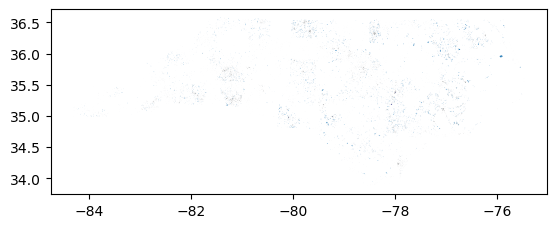

In [7]:
# plot the data
gdf.plot()

In [6]:
gdf.to_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-hp_v2.parquet')

In [5]:
layer_name = 'HP_Properties_NC'
# Read the .gdb file into a Dask GeoDataFrame
ddf = dgpd.read_file(gdb_path, layer=layer_name, chunksize=100)

# Write the Dask GeoDataFrame to Parquet format
ddf.to_parquet('/Users/mihiarc/Work/data/HeirsParcels/output_parquet_folder')


In [6]:
import dask_geopandas as dgpd

# Replace 'path_to_your_parquet_files' with the actual path to your Parquet files
# For example, if they are in a folder called 'data', use 'data/*.parquet'
dask_gdf = dgpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/output_parquet_folder/*.parquet')


In [7]:

# Print the first few rows of the Dask GeoDataFrame
print(dask_gdf.columns)


Index(['PARCELAPN', 'FIPS', 'PRCLDMPID', 'OBJECTID', 'Join_Count',
       'TARGET_FID', 'JOIN_FID', 'PARCELAPN_1', 'FIPS_1', 'TAXAPN',
       ...
       'FIPS_12_13', 'PRCLDMPID_12_13', 'SHAPE_Length_1', 'SHAPE_Area_1',
       'Existing_ID', 'Table_Joined', 'Match_Spatial', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object', length=145)


In [ ]:
# Compute the Dask GeoDataFrame to get a GeoPandas GeoDataFrame
gdf = dask_gdf.compute()

In [11]:
import dask.dataframe as dd

# Load the data
dask_gdf = dgpd.read_parquet('/Users/mihiarc/Work/data/HeirsParcels/output_parquet_folder/*.parquet')

# Inspect the columns before computing
print("Columns in dask_gdf before compute:")
print(dask_gdf.columns)

# Check if the required columns are present
required_columns = ['VALMRKT', 'ADDRSCORE', 'ASVSTCDDSC', 'PARCELAPN_12_13', 'heir_se_19', 'county_nam', 'LSSVSTCDDS', 'heir_se_40', 'PARCELAPN_1', 'VALASSIMP_', 'OBJECTID', 'heir_se_12', 'heir_se_26', 'STATE', 'PRCLDMPID_12', 'STSUFFIX', 'Existing_ID', 'heir_se_32', 'heir_se_29', 'VALMRKTIMP', 'PROPDMPID', 'heir_se_17', 'HPbin', 'heir_sea_7', 'STZIP', 'VALMRKTI_1', 'VALMRKTL_1', 'heir_se_14', 'heir_se_16', 'heir_se_47', 'MSTATE', 'MHSNUMB', 'MSTNAME', 'heir_sea_3', 'heir_se_33', 'heir_sea_6', 'heir_se_20', 'ASVSTCD', 'VALASSLND', 'FIPS_12', 'MCAREOFNAM', 'heir_se_45', 'heir_searc', 'STUNITNUM', 'LOCATIONID', 'heir_se_10', 'OWN2', 'heir_se_13', 'heir_se_53', 'STSTATE', 'heir_se_30', 'MUNITPRFX', 'VALMRKT_nu', 'VALMRKTLND', 'PRCLDMPID_12_13', 'heir_se_23', 'heir_se_36', 'TARGET_FID', 'heir_se_21', 'heir_se_24', 'heir_se_34', 'TAXAPN', 'incl2', 'ASMTVERSID', 'MZIP', 'heir_se_41', 'STUNITPRFX', 'VALAVM_num', 'VALASS_num', 'STSTNAME', 'PRCLDMPID_1', 'heir_se_52', 'LSTSLDTRN', 'PARCELAPN_12', 'heir_sea_2', 'heir_se_54', 'Join_Count', 'FIPS_12_13', 'SHAPE_Area_1', 'MZIP4', 'VALASSLND_', 'Shape_Length', 'XCOORD', 'LANDPSQFT', 'excl3', 'heir_se_31', 'heir_se_49', 'Match_Spatial', 'LSSVSTCD', 'heir_se_43', 'heir_se_44', 'heir_se_15', 'STQUADRANT', 'JOIN_FID', 'MMODE', 'heir_se_11', 'MQUADRNT', 'LSSVALTRNF', 'heir_se_39', 'heir_se_18', 'land_acre', 'STZIP4', 'heir_se_50', 'heir500', 'MPREDIR', 'heir_se_42', 'heir_se_51', 'OWN1', 'MUNITNUM', 'VALAVM', 'MCITY', 'heir_sea_5', 'STDIR', 'VALASSIMP', 'FIPS_1', 'heir_se_48', 'SHAPE_Length_1', 'heir_sea_9', 'LANDSQFT', 'heir_se_46', 'Table_Joined', 'Shape_Area', 'incl1', 'heir_se_37', 'excl2', 'heir_sea_8', 'heir_se_22', 'OWNPHONE', 'excl1', 'VALASS', 'heir_se_27', 'YCOORD', 'GEOSOURCE', 'heir_se_25', 'heir_se_38', 'heir_se_35', 'STCITY', 'heir_se_28', 'heir_sea_4', 'STHSNUM', 'heir_sea_1']

missing_columns = [col for col in required_columns if col not in dask_gdf.columns]
if missing_columns:
    raise KeyError(f"Missing columns in dask_gdf: {missing_columns}")


Columns in dask_gdf before compute:
Index(['PARCELAPN', 'FIPS', 'PRCLDMPID', 'OBJECTID', 'Join_Count',
       'TARGET_FID', 'JOIN_FID', 'PARCELAPN_1', 'FIPS_1', 'TAXAPN',
       ...
       'FIPS_12_13', 'PRCLDMPID_12_13', 'SHAPE_Length_1', 'SHAPE_Area_1',
       'Existing_ID', 'Table_Joined', 'Match_Spatial', 'Shape_Length',
       'Shape_Area', 'geometry'],
      dtype='object', length=145)


In [ ]:
# Compute the dask DataFrame
gdf = dask_gdf.compute()
print("Columns in gdf after compute:")
print(gdf.columns)

In [8]:
# Now you can analyze your combined polygon layer using GeoPandas
print(gdf.head())

  PARCELAPN   FIPS            PRCLDMPID  OBJECTID  Join_Count  TARGET_FID  \
0    124349  37001  100660192_151880362         1           1           1   
1    123852  37001  100660192_151880552         2           1           2   
2    124353  37001  100660192_151880365         3           1           3   
3    127453  37001  100660192_151879889         4           1           4   
4    127452  37001  100660192_151879883         5           1           5   

   JOIN_FID  PARCELAPN_1  FIPS_1    TAXAPN  ... FIPS_12_13  \
0   3748434     124349.0   37001  124349.0  ...      37001   
1   3749047     123852.0   37001  123852.0  ...      37001   
2   3748557     124353.0   37001  124353.0  ...      37001   
3   3745826     127453.0   37001  127453.0  ...      37001   
4   3745820     127452.0   37001  127452.0  ...      37001   

       PRCLDMPID_12_13 SHAPE_Length_1  SHAPE_Area_1 Existing_ID Table_Joined  \
0  100660192_151880362       0.001737  1.329530e-07          ID       Joined   
1  1

In [ ]:
gdf.to_parquet('/Users/mihiarc/Work/data/HeirsParcels/nc-hp.parquet')